Import external dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# a nice way of filtering out deprecated warnings
import warnings
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import scipy
import scipy.cluster.hierarchy as sch
from statsmodels.formula.api import *

warnings.filterwarnings("ignore")

In [2]:
new_york_weather_2015 = pd.read_csv("../raw_data/2015_New_York_weather.csv", index_col=False)

In [3]:
weather_data=new_york_weather_2015.drop(['STATION','NAME','LATITUDE','LONGITUDE','ELEVATION','AWND_ATTRIBUTES',
                                'SNOW_ATTRIBUTES','SNWD_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES',
                                'TMIN_ATTRIBUTES','TSUN_ATTRIBUTES','WDF2_ATTRIBUTES','WDF5_ATTRIBUTES',
                                'WSF2_ATTRIBUTES','WSF5_ATTRIBUTES','WT01_ATTRIBUTES','WT02_ATTRIBUTES',
                                'WT03_ATTRIBUTES','WT04_ATTRIBUTES','WT06_ATTRIBUTES','WT08_ATTRIBUTES',
                                'PGTM_ATTRIBUTES','PRCP_ATTRIBUTES','PGTM','TSUN','TAVG'],axis='columns')

In [4]:
weather_data['TMAX']=(weather_data['TMAX']-32)*5/9
weather_data['TMIN']=(weather_data['TMIN']-32)*5/9
weather_data['Temperature_AVG']=(weather_data['TMAX']+weather_data['TMIN'])/2
weather_data['Weather']=weather_data[['WT01','WT02','WT03','WT04','WT06','WT08']].sum(axis=1)
weather_data=weather_data.drop(['WT01','WT02','WT03','WT04','WT06','WT08','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5'
                                ,'AWND','PRCP','SNOW','SNWD'],axis='columns')
weather_data['Weather']=np.where(weather_data['Weather']>0, 'innormal','normal')

In [5]:
weather_data.to_pickle('../preprocessed_data/cleaned_weather_data_2015.pkl')

In [6]:
yellow_data_2015 = pd.read_pickle('../preprocessed_data/drop_yellow_tripdata_2015.pkl')
yellow_data_2015=yellow_data_2015[(yellow_data_2015["payment_type"]==1)]

In [7]:
#drop off some attribuites
yellow_data_2015=yellow_data_2015.drop(["payment_type"],axis='columns')

In [8]:
yellow_data_2015['tpep_pickup_datetime']=pd.to_datetime(yellow_data_2015['tpep_pickup_datetime'])
yellow_data_2015['tpep_dropoff_datetime']=pd.to_datetime(yellow_data_2015['tpep_dropoff_datetime'])
yellow_data_2015['Date']=yellow_data_2015['tpep_pickup_datetime'].dt.normalize()

In [9]:
yellow_data_2015['Duration']=(yellow_data_2015['tpep_dropoff_datetime']-yellow_data_2015['tpep_pickup_datetime'])
yellow_data_2015['Duration']=yellow_data_2015['Duration']/np.timedelta64(1,'m')

In [10]:
yellow_data_2015['Date']=yellow_data_2015['Date'].astype(str)


In [11]:
yellow_data_2015.to_pickle('../preprocessed_data/data_engineering_yellow_2015.pkl')

In [12]:
yellow_data_2015 = pd.read_pickle('../preprocessed_data/data_engineering_yellow_2015.pkl')

In [13]:
cleaned_weather_2015 = pd.read_pickle('../preprocessed_data/cleaned_weather_data_2015.pkl')

In [14]:
cleaned_data=pd.merge(yellow_data_2015,cleaned_weather_2015,left_on='Date',right_on='DATE')

In [15]:
cleaned_data.to_pickle('../preprocessed_data/weather_and_yellow_2015.pkl')

In [16]:
cleaned_data=pd.read_pickle('../preprocessed_data/weather_and_yellow_2015.pkl')

In [17]:
#sampling the merged data
sample=cleaned_data.sample(frac=0.05,replace=True,random_state=30034)
sample=sample.sort_values(by=['tpep_pickup_datetime']).reset_index(drop=True)

In [18]:
#save data
sample.to_csv('../preprocessed_data/weather_and_yellow_2015_sample.csv')

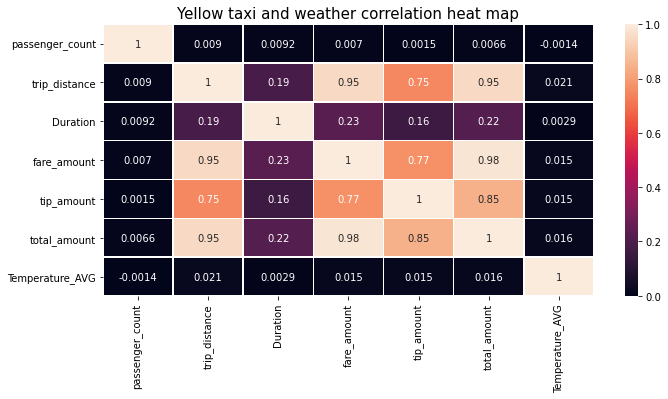

In [19]:
key_colS=['passenger_count','trip_distance','Duration','fare_amount','tip_amount','total_amount','Temperature_AVG']
plt.figure(figsize=(11,5))
sns.heatmap(sample[key_colS].corr(), annot=True,linewidths=0.5)
plt.title("Yellow taxi and weather correlation heat map", fontsize=15)
plt.savefig('../plots/Yellow taxi and weather correlation heat map.jpeg')
plt.show()


sampling the predicted dataset

In [9]:
data_2016=pd.read_pickle('../preprocessed_data/cleaned_yellow_tripdata_2016_01.pkl')

In [14]:
yellow_data_2016=data_2016[(data_2016["payment_type"]==1)]
yellow_data_2016=yellow_data_2016.drop(['VendorID','RatecodeID','store_and_fwd_flag','extra','mta_tax',
                                        'tolls_amount','improvement_surcharge',"payment_type"],axis='columns')

In [17]:
yellow_data_2016['tpep_pickup_datetime']=pd.to_datetime(yellow_data_2016['tpep_pickup_datetime'])
yellow_data_2016['tpep_dropoff_datetime']=pd.to_datetime(yellow_data_2016['tpep_dropoff_datetime'])
yellow_data_2016['Date']=yellow_data_2016['tpep_pickup_datetime'].dt.normalize()

In [18]:
yellow_data_2016['Duration']=(yellow_data_2016['tpep_dropoff_datetime']-yellow_data_2016['tpep_pickup_datetime'])
yellow_data_2016['Duration']=yellow_data_2016['Duration']/np.timedelta64(1,'m')

In [19]:
yellow_data_2016['Date']=yellow_data_2016['Date'].astype(str)

In [20]:
new_york_weather_2016 = pd.read_csv("../raw_data/2016_1 new york weather data.csv", index_col=False)

In [27]:
weather_data=new_york_weather_2016.drop(['STATION','NAME','PGTM','TSUN','TAVG'],axis='columns')

In [29]:
weather_data['TMAX']=(weather_data['TMAX']-32)*5/9
weather_data['TMIN']=(weather_data['TMIN']-32)*5/9
weather_data['Temperature_AVG']=(weather_data['TMAX']+weather_data['TMIN'])/2
weather_data['Weather']=weather_data[['WT01','WT02','WT03','WT04','WT06','WT08']].sum(axis=1)
weather_data=weather_data.drop(['WT01','WT02','WT03','WT04','WT06','WT08','TMAX','TMIN','WDF2','WDF5','WSF2','WSF5'
                                ,'AWND','PRCP','SNOW','SNWD'],axis='columns')
weather_data['Weather']=np.where(weather_data['Weather']>0, 'innormal','normal')

In [31]:
weather_data.to_pickle('../preprocessed_data/cleaned_weather_data_2016.pkl')

In [32]:
cleaned_weather_2016 = pd.read_pickle('../preprocessed_data/cleaned_weather_data_2016.pkl')

In [34]:
cleaned_data_2016=pd.merge(yellow_data_2016,cleaned_weather_2016,left_on='Date',right_on='DATE')

In [36]:
cleaned_data_2016.to_pickle('../preprocessed_data/weather_and_yellow_2016.pkl')

In [39]:
cleaned_data_2016=pd.read_pickle('../preprocessed_data/weather_and_yellow_2016.pkl')
sample=cleaned_data_2016.sample(frac=0.1,replace=True,random_state=30034)
sample=sample.sort_values(by=['tpep_pickup_datetime']).reset_index(drop=True)
sample.to_csv('../preprocessed_data/weather_and_yellow_2016_sample.csv')